# ETAPE 1 : IMPORTATION DES LIBRAIRIES

In [75]:
# Importer les Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# ETAPE 2 : CHARGER LES DONNEES

In [76]:
# # Charger les donnees
data = pd.read_csv('Data/darknet.csv')
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


# ETAPE 3 : ANALYSE DES DONNEES

In [77]:
# Étape 3 : Analyse de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

In [78]:
data.drop(columns='Flow ID', inplace=True, axis=1)
data.drop(columns='Src IP', inplace=True, axis=1)
data.drop(columns='Dst IP', inplace=True, axis=1)
data.drop(columns='Timestamp', inplace=True, axis=1)
data.head()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


# ETAPE 4 : PRETRAITEMENT DES DONNEES

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
encoder = LabelEncoder()

In [81]:
data['Label'] = encoder.fit_transform(data['Label'])
data['Label.1'] = encoder.fit_transform(data['Label.1'])
data.head()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
1,32872,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
2,32873,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
3,32874,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
4,32875,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [82]:
data.isnull().sum()

Unnamed: 0       0
Src Port         0
Dst Port         0
Protocol         0
Flow Duration    0
                ..
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Label.1          0
Length: 82, dtype: int64

In [83]:
import seaborn as sns

<Axes: >

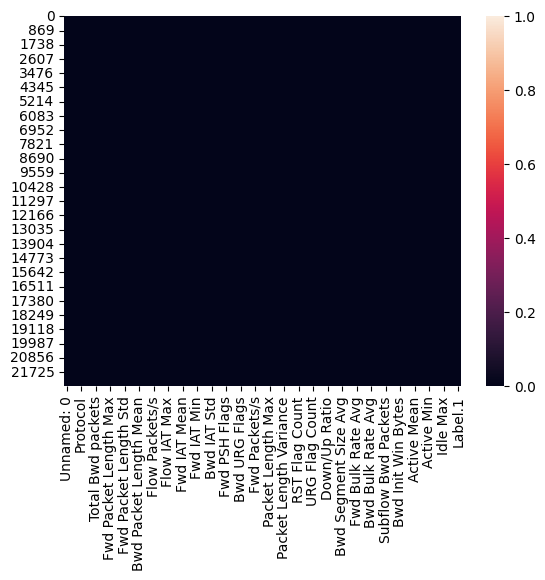

In [84]:
sns.heatmap(data.isnull())

In [85]:
data

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,0,0
1,32872,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,0,0
2,32873,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,0,0
3,32874,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,0,0
4,32875,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,52161,40019,6,119786918,4,2,4,2,2,...,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,3,1
22572,139215,53288,57191,6,119546234,21,13,106,80,15,...,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,3,1
22573,139216,49539,57191,17,119749355,24,5,556,110,28,...,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,3,1
22574,139217,49539,23528,17,119992029,8,6,176,132,22,...,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,3,1


# ETAPE 5 : DIVISION DES DONNEES (NORMALISATION DES DONNEES)

In [86]:
data.columns

Index(['Unnamed: 0', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count

In [87]:
#Étape 5 : Diviser les données : Train et Test (Normaliser les données)
#X = data.drop(columns='label', inplace=True, axis=1)
#y = data['label']
a = data.iloc[ : , :-1]
b = data.iloc[ : , -1]

In [88]:
a

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32871,5222,56297,6,60320002,5,3,447,117,165,...,20,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,0
1,32872,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,0
2,32873,5222,56297,6,116498878,12,12,5848,2596,933,...,20,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,0
3,32874,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,0
4,32875,5222,56297,6,91832679,14,14,6029,2761,741,...,20,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,52161,40019,6,119786918,4,2,4,2,2,...,32,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,3
22572,139215,53288,57191,6,119546234,21,13,106,80,15,...,32,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,3
22573,139216,49539,57191,17,119749355,24,5,556,110,28,...,8,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,3
22574,139217,49539,23528,17,119992029,8,6,176,132,22,...,8,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,3


In [89]:
b

0        0
1        0
2        0
3        0
4        0
        ..
22571    1
22572    1
22573    1
22574    1
22575    1
Name: Label.1, Length: 22576, dtype: int64

In [90]:
# Splitting 
from sklearn.model_selection import train_test_split

In [91]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.23, random_state=40)

In [92]:
print("A-train:", a_train.shape)
print("A-test:", a_test.shape)
print("A-train:", b_train.shape)
print("A-train:", b_test.shape)

A-train: (17383, 81)
A-test: (5193, 81)
A-train: (17383,)
A-train: (5193,)


In [93]:
import numpy as np
print(np.isnan(a_train).sum())
print(np.isinf(a_train).sum())

Unnamed: 0       0
Src Port         0
Dst Port         0
Protocol         0
Flow Duration    0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 81, dtype: int64
Unnamed: 0       0
Src Port         0
Dst Port         0
Protocol         0
Flow Duration    0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 81, dtype: int64


In [94]:
a_train = np.nan_to_num(a_train, nan=np.nanmean(a_train), posinf=np.nanmax(a_train), neginf=np.nanmin(a_train))
a_test = np.nan_to_num(a_test, nan=np.nanmean(a_test), posinf=np.nanmax(a_test), neginf=np.nanmin(a_test))

In [95]:
a_train = a_train[~np.isnan(a_train).any(axis=1)]
a_train = a_train[~np.isinf(a_train).any(axis=1)]

In [96]:
print("Max:", np.max(a_train))
print("Min:", np.min(a_train))
print("Mean:", np.mean(a_train))
print("Std:", np.std(a_train))

Max: 1456420000000000.0
Min: -213.0
Mean: 18746366583907.504
Std: 160958325299581.78


In [97]:
import numpy as np

# Définir un seuil basé sur l'écart-type (ex: 3 fois la std)
threshold = np.mean(a_train) + 3 * np.std(a_train)

# Vérifier combien de valeurs dépassent ce seuil
print("Nombre de valeurs extrêmes :", np.sum(a_train > threshold))

Nombre de valeurs extrêmes : 18986


In [98]:
a_train = np.clip(a_train, a_min=-1e6, a_max=1e6)
a_test = np.clip(a_test, a_min=-1e6, a_max=1e6)

In [99]:
# Standariser les festures
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [100]:
a_train

array([[ 1.10990115,  0.10730972, -0.52575657, ..., -0.79111669,
        -0.79111669,  1.39536414],
       [ 0.38135367, -1.70156975, -0.52411794, ..., -0.79111669,
        -0.79111669, -0.25866169],
       [ 0.7993517 , -1.76705746, -0.52575657, ..., -0.79111669,
        -0.79111669,  1.39536414],
       ...,
       [-1.4230643 , -0.06202921, -0.52575657, ..., -0.79111669,
        -0.79111669, -1.0856746 ],
       [-1.42167953, -1.98994546,  1.48078552, ..., -0.79111669,
        -0.79111669, -1.0856746 ],
       [-1.49771414, -1.53867469,  1.98081275, ..., -0.79111669,
        -0.79111669, -1.0856746 ]])

# ETAPE 6 : CONSTRUIRE LE SNN

In [101]:
# Étape 6 : Construire le Shallow Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [102]:
# Creation du model
model = Sequential()

In [103]:
# Ajout de la couche d'entree == couche cachee
model.add(Dense(10, input_shape=(81,), activation='relu'))
#model.add(Dense(16, input_shape=(9,), activation='relu'))
#model.add(Dense(32, activation='relu'))

# Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modele
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture ou la structure du model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831 (3.25 KB)

 Trainable params: 831 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
import numpy as np
a_train = np.array(a_train).reshape(-1, 81)
a_test = np.array(a_test).reshape(-1, 81)


In [105]:
print(a_train.shape)
print(a_test.shape)

(17374, 81)
(5193, 81)


In [121]:
import numpy as np
a_train = np.array(a_train)
a_test = np.array(a_test)

In [107]:
if isinstance(a_train, pd.DataFrame):
    a_train = a_train.iloc[:, :81]
    a_test = a_test.iloc[:, :81]

In [120]:
print(f"a_train shape: {a_train.shape}")  
print(f"b_train shape: {b_train.shape}")  

a_train shape: (17374, 81)
b_train shape: (17374,)


In [109]:
b_train = b_train[:a_train.shape[0]]

In [122]:
import pandas as pd

print(pd.DataFrame(a_train).isna().sum().sum())  
print(pd.DataFrame(b_train).isna().sum().sum())  

print(np.isinf(a_train).sum())  
print(np.isinf(b_train).sum())  


0
0
0
0


In [123]:
print(f"a_train shape: {a_train.shape}")  
print(f"b_train shape: {b_train.shape}")  
print(f"a_test shape: {a_test.shape}")    
print(f"b_test shape: {b_test.shape}")    

a_train shape: (17374, 81)
b_train shape: (17374,)
a_test shape: (5193, 81)
b_test shape: (5193,)


In [112]:
# Entrainement du modele
history = model.fit(a_train, b_train, epochs=50, verbose=1, validation_data=(a_test, b_test))

Epoch 1/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5238 - loss: 0.7148 - val_accuracy: 0.7938 - val_loss: 0.6133
Epoch 2/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5497 - loss: 0.6937 - val_accuracy: 0.7880 - val_loss: 0.6138
Epoch 3/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5537 - loss: 0.6877 - val_accuracy: 0.7866 - val_loss: 0.6280
Epoch 4/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5525 - loss: 0.6864 - val_accuracy: 0.7968 - val_loss: 0.6161
Epoch 5/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5584 - loss: 0.6854 - val_accuracy: 0.7628 - val_loss: 0.6325
Epoch 6/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5598 - loss: 0.6855 - val_accuracy: 0.8327 - val_loss: 0.6074
Epoch 7/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5534 - loss: 0.6876 - val_accuracy: 0.8069 - val_loss: 0.6073
Epoch 8/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5605 - loss: 0.6853 - val_accuracy: 0.

# ETAPE 7 : VISUALISATION DE L'ENTRAINEMENT DU RESEAU DE NEURONE

In [113]:
history

In [114]:
# Étape 7 : Visualiser l’évolution de l’entrainement du réseau de neurone
import matplotlib.pyplot as plt

In [115]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

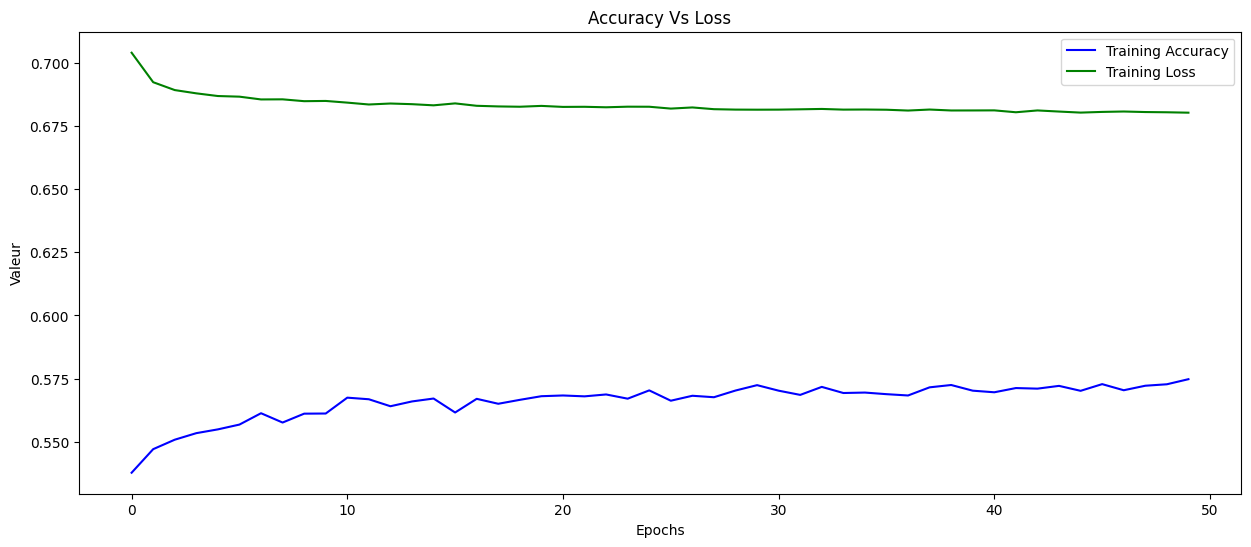

In [116]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='green', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

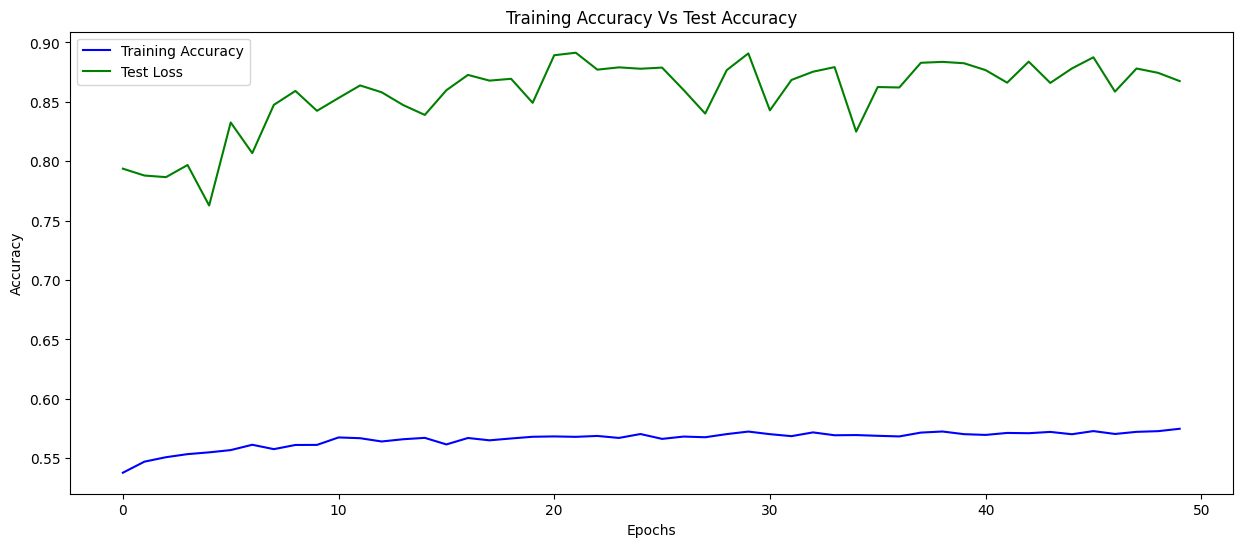

In [117]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='green', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.show()

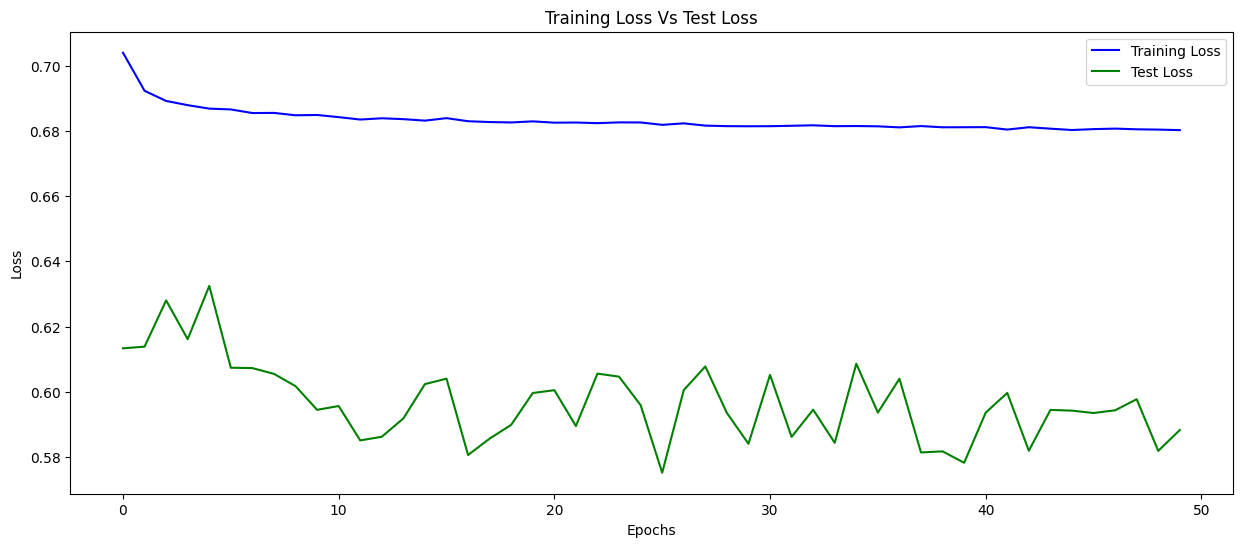

In [118]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='green', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()

# ETAPE 8 : EVALUER LE MODELE

In [119]:
# Étape 8 : Evaluer le modèle
model.evaluate(a_test, b_test)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.5860 


[0.5882937908172607, 0.8675139546394348]